## Lab Exam - 1

- **Question - 3**: Define two kernels which can be used to extract horizontal and vertical edges of
the grayscale image.


- **Question - 4**: Write a function, similar to cv2.filter2D() function, which can be used for
convolution in the spatial domain. Using that function save a figure showing the
vertical and horizontal edges of the grayscale image side-by-side.

### Question - 3

- Horizontal

```py
[
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
]
```

- Vertical

```py
[
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]
]
````


### Question - 4

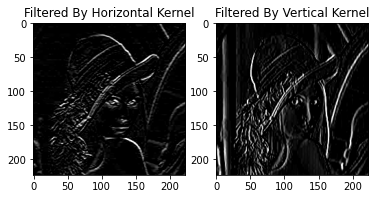

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def conv(mat, kernel):
    row, col = mat.shape
    r, c = kernel.shape[0] // 2, kernel.shape[1] // 2
    r, c = r * 2, c * 2

    new_image = np.zeros((row - r, col - c), dtype=np.uint8)
    for i in range(row - r):
        for j in range(col - c):
            temp = np.sum(np.multiply(mat[i:3+i, j:3+j], kernel))
            if temp > 255:
                new_image[i][j] = 255
            elif temp < 0:
                new_image[i][j] = 0
            else:
                new_image[i][j] = temp

    return new_image 

def main():
    path = 'lenna.jpeg'
    img  = plt.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    horz_kernel = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])
    vert_kernel = np.array([[-1,0,1],[-1,0,1], [-1,0,1]])

    horz = conv(gray, horz_kernel)    
    vert = conv(gray, vert_kernel)    

    plt.subplot(1,2,1)
    plt.imshow(horz, cmap='gray')
    plt.title("Filtered By Horizontal Kernel")
    plt.subplot(1,2,2)
    plt.imshow(vert, cmap='gray')
    plt.title("Filtered By Vertical Kernel")


    plt.show()

main()

- **Question - 4**: Write a function, similar to cv2.filter2D() function, which can be used for
convolution in the spatial domain. Using that function save a figure showing the
diagonal and anti-diagonal edges of the grayscale image side-by-side.

- **Question - 5**: Write a function to blur an image. Display a RGB image, its grayscale image and
blurred image.

#### Same as before.....

![images](da.png)

#### For blurring using average filter .... 

```
[
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]
```

```py
avg = np.ones((3,3)) / 9
```

### For salt pepper noise using median filter .....

```py
median_filtered = cv2.medianBlur(gray, 3)
```


### Question 2-2

Compare blurred images created in spatial domain and frequency domain side-by-side.

> For spaital domain same as before ... using `average filter` blur the image....

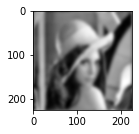

In [3]:
## Solution code for frequency domain

import matplotlib.pyplot as plt
import numpy as np
import cv2

img_path = "lenna.jpeg"
img = plt.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

g = np.fft.fft2(gray)
g_shift = np.fft.fftshift(g)

M, N = gray.shape       # M->Row, N->Col
H = np.zeros((M, N), dtype=np.float32)

# parameter D0 control the shape of our gaussian filter.

D0 = 10   # cut off frequency
for u in range(M):
    for v in range(N):
        D = np.sqrt((u - M/2) ** 2 + (v - N/2) ** 2)
        H[u, v] = np.exp((-D**2) / (2 * D0 * D0))


# low pass
plt.subplot(2,1,1)
plt.imshow(np.abs(np.fft.ifft2(np.fft.ifftshift(g_shift * H))), cmap='gray')

plt.show()